In [1]:
import os, sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aa = ["A", "C", "D", "E", "F", "G", "H",  "I",  "K",  "L",  "M",  "N", "P", "Q", "R", "S", "T", "V",  "W", "Y"]

## Old Dataset (Original Aptamer-Peptide Dataset)

In [3]:
pos1 = "0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	770225 	0 	0 	0 	0 	0 	0 	0 	0 	0 "
pos1 = pos1.strip().split()
pos1 = [int(x) for x in pos1]

In [4]:
pos2 = "61636 	28122 	18576 	32583 	18059 	84093 	14563 	16009 	27209 	67225 	22518 	13856 	34188 	22720 	88940 	77500 	33710 	54384 	33775 	20559"
pos2 = pos2.strip().split()
pos2 = [int(x) for x in pos2]

In [5]:
pos3 = "61459 	27347 	18087 	30214 	17064 	89076 	15204 	16206 	23437 	72245 	24017 	14233 	38299 	21127 	89977 	63308 	32553 	63685 	36756 	15931"
pos3 = pos3.strip().split()
pos3 = [int(x) for x in pos3]


In [6]:
pos4 = "59092 	27858 	18296 	30689 	17154 	94163 	14887 	16276 	24225 	70814 	24490 	13709 	29486 	21902 	93981 	61558 	31086 	66024 	38257 	16278"
pos4 = pos4.strip().split()
pos4 = [int(x) for x in pos4]

In [7]:
pos5 = "59582 	27510 	19281 	31811 	19269 	97660 	14169 	16880 	24841 	67425 	24697 	14079 	27854 	20813 	92050 	58315 	29945 	67610 	40249 	16185"
pos5 = pos5.strip().split()
pos5 = [int(x) for x in pos5]

In [8]:
pos6 = "57913 	28478 	18489 	30690 	18718 	97917 	13646 	17644 	24730 	69787 	25452 	13371 	25891 	19272 	94086 	56409 	30045 	69443 	42400 	15844"
pos6 = pos6.strip().split()
pos6 = [int(x) for x in pos6]

In [9]:
pos7 = "59896 	27823 	18461 	34207 	17453 	119165 	11512 	15886 	19885 	67148 	22902 	11665 	25140 	16679 	94993 	51579 	28069 	70805 	42669 	14288"
pos7 = pos7.strip().split()
pos7 = [int(x) for x in pos7]

In [10]:
pos8 = "49851 	28667 	20977 	31569 	19241 	125465 	16030 	18226 	18901 	61639 	20567 	12953 	22937 	18393 	94320 	56427 	27511 	71230 	40769 	14552"
pos8 = pos8.strip().split()
pos8 = [int(x) for x in pos8]

In [11]:
positions = [pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8]

In [12]:
# Divide by total count to get percentages
percentages = []
for lst in positions:
    lst = [x/float(770225) for x in lst]
    percentages.append(lst)

In [13]:
# Associate with amino acid in dictionary
aa_percentages_by_position = {}
for i, a in enumerate(aa):
    pos_perc = []
    for j in range(8):
        pos_perc.append(percentages[j][i])
    aa_percentages_by_position[a] = pos_perc

In [14]:
# NNK Percentages from the original document
nnk_percentages = [0.0625, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625, 0.03125, 0.03125, 0.03125, 0.09375, 0.03125, 0.03125, 0.0625, 0.03125, 0.09375, 0.09375, 0.0625, 0.0625, 0.03125, 0.03125]

In [15]:
sum(nnk_percentages)

0.96875

In [16]:
# Modify the NNK percentages to sum to 1 (not removing M)
aa_list = ['R', 'L', 'S', 'A', 'G', 'P', 'T', 'V', 'N', 'D', 'C', 'Q', 'E', 'H', 'I', 'K', 'M', 'F', 'W', 'Y']
NNK_freq = [0.09375]*3 + [0.0625]*5 + [0.03125]*13 #freq of 21 NNK codons including the stop codon
sum_20 = 0.0625*5 + 0.09375*3 + 0.03125*12 #sum of freq without the stop codon
pvals = [0.09375/sum_20]*3 + [0.0625/sum_20]*5 + [0.03125/sum_20]*12 #normalize freq for 20 codons
pvals = [0.09375/sum_20]*3 + [0.0625/sum_20]*5 + [0.03125/sum_20]*11 + \
        [1- sum([0.09375/sum_20]*3 + [0.0625/sum_20]*5 + [0.03125/sum_20]*11)] 
new_nnk = {}
for i in range(len(aa_list)):
    new_nnk[aa_list[i]] = pvals[i]

In [17]:
# Gather stats about the dataset percentages, not including the first position
actual_average_percentages = []
actual_std = []
for a in aa_percentages_by_position.keys():
    arr = np.asarray(aa_percentages_by_position[a][1:])
    actual_average_percentages.append(sum(aa_percentages_by_position[a][1:])/7)
    std = np.std(arr[1:])
    actual_std.append(std)

In [18]:
new_nnk_bar = []
for i in range(len(aa)):
    new_nnk_bar.append(new_nnk[aa[i]])
sum(new_nnk_bar)

1.0000000000000002

[0.07593866356305902, 0.03631684619058439, 0.024513616151124667, 0.041131394815058675, 0.023547479168888497, 0.13123048459865624, 0.01854949620472682, 0.02172407877104557, 0.030274641454491498, 0.08833837978698246, 0.03053708795667314, 0.01740975503447508, 0.03779878792375141, 0.02613447832961611, 0.12025187445227044, 0.07884449349216138, 0.03949105780778344, 0.0859082921038843, 0.05098231963758271, 0.021076772557184122]


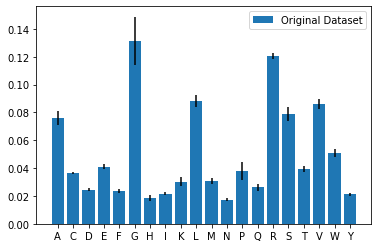

In [19]:
plt.bar(aa, actual_average_percentages, yerr=actual_std, label="Original Dataset")
plt.legend()
print(str(actual_average_percentages))

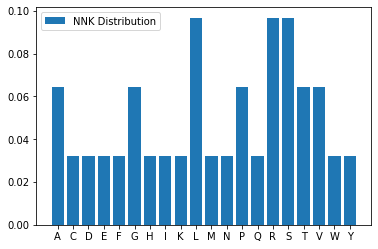

In [20]:
plt.bar(aa, new_nnk_bar, label='NNK Distribution')
plt.legend()

# Thoughts
* The percentages vary (maybe significantly) and error bars are high
* There arent' really three steps in the same way as the NNK distribution

## New experimental replicate dataset

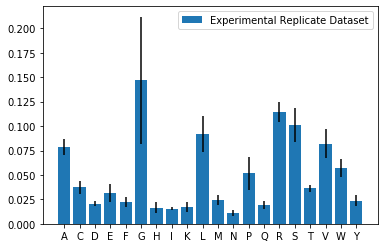

In [21]:
pos1 = "0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	21616 	0 	0 	0 	0 	0 	0 	0 	0 	0"
pos2 = "1685 	1158 	408 	527 	754 	1831 	310 	335 	318 	1914 	479 	184 	1268 	330 	1900 	3922 	975 	1368 	893 	1057"
pos3 = "1719 	739 	392 	371 	641 	1988 	255 	335 	271 	2649 	641 	356 	1899 	454 	2335 	2443 	852 	1685 	1017 	574"
pos4 = "1950 	927 	501 	681 	422 	2335 	419 	352 	437 	2072 	625 	218 	987 	536 	2595 	2349 	756 	1833 	1086 	535"
pos5 = "1788 	850 	442 	735 	533 	2582 	382 	274 	450 	1951 	526 	298 	984 	430 	2517 	1840 	784 	2291 	1464 	495"
pos6 = "1685 	841 	454 	631 	376 	3081 	443 	367 	543 	2243 	614 	305 	754 	513 	2737 	1533 	744 	2064 	1358 	330"
pos7 = "1751 	578 	392 	1037 	337 	4318 	164 	350 	277 	1584 	500 	178 	928 	280 	2956 	1416 	786 	1903 	1584 	297"
pos8 = "1338 	542 	527 	767 	358 	6075 	551 	306 	277 	1446 	309 	180 	996 	379 	2336 	1795 	580 	1253 	1312 	289"
raw_positions = [pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8]
str_positions = [x.strip().split() for x in raw_positions]
int_positions = [[int(x) for x in y] for y in str_positions]
percentages = [[x/float(21616) for x in y] for y in int_positions]
aa_percentages_by_position = {}
for i, a in enumerate(aa):
    pos_perc = []
    for j in range(8):
        pos_perc.append(percentages[j][i])
    aa_percentages_by_position[a] = pos_perc
# Get stats about the dataset without the first position
actual_average_percentages = []
actual_std = []
for a in aa_percentages_by_position.keys():
    arr = np.asarray(aa_percentages_by_position[a][1:])
    actual_average_percentages.append(sum(aa_percentages_by_position[a][1:])/7)
    std = np.std(arr[1:])
    actual_std.append(std)
plt.bar(aa, actual_average_percentages, yerr=actual_std, label="Experimental Replicate Dataset")
plt.legend()
plt.show()

## Combining the original dataset + experimental replicate

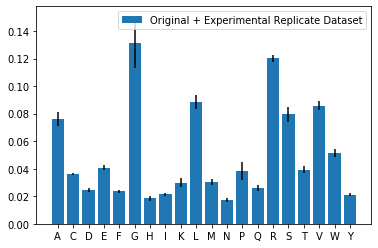

In [22]:
pos1 = "0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	791841 	0 	0 	0 	0 	0 	0 	0 	0 	0"
pos2 = "63321 	29280 	18984 	33110 	18813 	85924 	14873 	16344 	27527 	69139 	22997 	14040 	35456 	23050 	90840 	81422 	34685 	55752 	34668 	21616"
pos3 = "63178 	28086 	18479 	30585 	17705 	91064 	15459 	16541 	23708 	74894 	24658 	14589 	40198 	21581 	92312 	65751 	33405 	65370 	37773 	16505"
pos4 = "61042 	28785 	18797 	31370 	17576 	96498 	15306 	16628 	24662 	72886 	25115 	13927 	30473 	22438 	96576 	63907 	31842 	67857 	39343 	16813"
pos5 = "61370 	28360 	19723 	32546 	19802 	100242 	14551 	17154 	25291 	69376 	25223 	14377 	28838 	21243 	94567 	60155 	30729 	69901 	41713 	16680"
pos6 = "59598 	29319 	18943 	31321 	19094 	100998 	14089 	18011 	25273 	72030 	26066 	13676 	26645 	19785 	96823 	57942 	30789 	71507 	43758 	16174"
pos7 = "61647 	28401 	18853 	35244 	17790 	123483 	11676 	16236 	20162 	68732 	23402 	11843 	26068 	16959 	97949 	52995 	28855 	72708 	44253 	14585"
pos8 = "51189 	29209 	21504 	32336 	19599 	131540 	16581 	18532 	19178 	63085 	20876 	13133 	23933 	18772 	96656 	58222 	28091 	72483 	42081 	14841"
raw_positions = [pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8]
str_positions = [x.strip().split() for x in raw_positions]
int_positions = [[int(x) for x in y] for y in str_positions]
percentages = [[x/float(791841) for x in y] for y in int_positions]
aa_percentages_by_position = {}
for i, a in enumerate(aa):
    pos_perc = []
    for j in range(8):
        pos_perc.append(percentages[j][i])
    aa_percentages_by_position[a] = pos_perc
# Get stats about the dataset without the first position
actual_average_percentages = []
actual_std = []
for a in aa_percentages_by_position.keys():
    arr = np.asarray(aa_percentages_by_position[a][1:])
    actual_average_percentages.append(sum(aa_percentages_by_position[a][1:])/7)
    std = np.std(arr[1:])
    actual_std.append(std)
plt.bar(aa, actual_average_percentages, yerr=actual_std, label="Original + Experimental Replicate Dataset")
plt.legend()
plt.show()

In [23]:
# New frequency table
new_freqs = [0.07593866356305902, 0.03631684619058439, 0.024513616151124667, 0.041131394815058675, 0.023547479168888497, 0.13123048459865624, 0.01854949620472682, 0.02172407877104557, 0.030274641454491498, 0.08833837978698246, 0.03053708795667314, 0.01740975503447508, 0.03779878792375141, 0.02613447832961611, 0.12025187445227044, 0.07884449349216138, 0.03949105780778344, 0.0859082921038843, 0.05098231963758271, 0.021076772557184122]

## Peptides associated with the control aptamer 

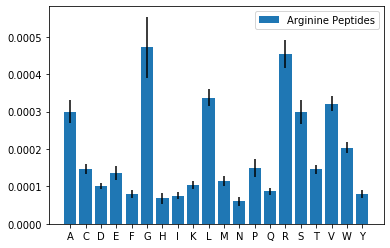

In [26]:
pos1 = "0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	2960 	0 	0 	0 	0 	0 	0 	0 	0 	0 "
pos2 = "250 	123 	70 	88 	84 	341 	47 	57 	81 	279 	86 	45 	152 	72 	332 	313 	106 	204 	156 	74 "
pos3 = "259 	117 	77 	108 	65 	295 	69 	58 	83 	279 	84 	44 	151 	77 	325 	258 	123 	269 	144 	75"
pos4 = "255 	126 	72 	112 	68 	338 	52 	71 	80 	282 	99 	61 	116 	69 	335 	251 	104 	260 	159 	50"
pos5 = "253 	123 	83 	99 	60 	361 	50 	57 	96 	278 	103 	42 	106 	72 	364 	229 	126 	241 	157 	60"
pos6 = "220 	125 	86 	98 	70 	352 	49 	69 	90 	256 	105 	60 	88 	55 	362 	217 	125 	290 	182 	61"
pos7 = "236 	98 	77 	143 	52 	461 	39 	50 	77 	263 	79 	36 	110 	66 	387 	183 	105 	272 	169 	57"
pos8 = "190 	105 	90 	111 	45 	471 	72 	53 	70 	230 	81 	47 	108 	69 	411 	210 	120 	246 	160 	71"
raw_positions = [pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8]
str_positions = [x.strip().split() for x in raw_positions]
int_positions = [[int(x) for x in y] for y in str_positions]
percentages = [[x/float(791841) for x in y] for y in int_positions]
aa_percentages_by_position = {}
for i, a in enumerate(aa):
    pos_perc = []
    for j in range(8):
        pos_perc.append(percentages[j][i])
    aa_percentages_by_position[a] = pos_perc
# Get stats about the dataset without the first position
actual_average_percentages = []
actual_std = []
for a in aa_percentages_by_position.keys():
    arr = np.asarray(aa_percentages_by_position[a][1:])
    actual_average_percentages.append(sum(aa_percentages_by_position[a][1:])/7)
    std = np.std(arr[1:])
    actual_std.append(std)
plt.bar(aa, actual_average_percentages, yerr=actual_std, label="Arginine Peptides")
plt.legend()
plt.show()

## No peptides displayed (negative control)

## Clarify why there are biases and are those systematic
* 